In [1]:
import pandas as pd
import numpy as np

In [2]:
ap=pd.read_csv("Admission_Predict.csv")

In [3]:
ap.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA,Cluster
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [4]:
import seaborn as sns

In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
#for preprocessing
from sklearn.preprocessing import StandardScaler

In [7]:
# for splitting dataset
from sklearn.model_selection import train_test_split

In [8]:
# for clustering
from sklearn.cluster import KMeans

In [9]:
# I Python Notebook cell multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'

In [10]:
# to display the wide array
np.set_printoptions(precision=3, threshold=np.inf)

In [11]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   COA                400 non-null    float64
 9   Cluster            400 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.4 KB


In [12]:
ap.shape

(400, 10)

In [13]:
ap.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA,Cluster
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350,0.91250
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609,0.28292
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,0.00000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000,1.00000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000,1.00000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000,1.00000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,1.00000


In [14]:
# how many are accepted and how many are rejected
ap.Cluster.value_counts()

1    365
0     35
Name: Cluster, dtype: int64

In [15]:
# drop columns not needed for clustering
ap.drop(["Serial No.", "COA"], axis=1, inplace=True)

In [16]:
ap.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Cluster
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [17]:
# renaming the column names of GRE score and TOEFL score as GRE_Score and TOEFL_Score
ap.rename({'GRE Score' : 'GRE_Score', 'TOEFL Score': 'TOEFL_Score'}, axis=1, inplace=True)

In [18]:
ap.head()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Cluster
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GRE_Score', ylabel='Density'>

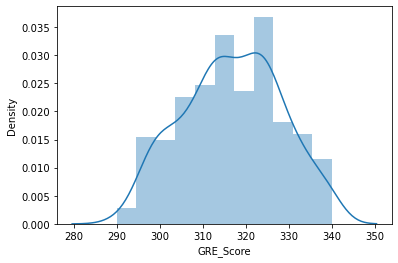

In [19]:
# distribution plot for GRE_score
sns.distplot(ap.GRE_Score)

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


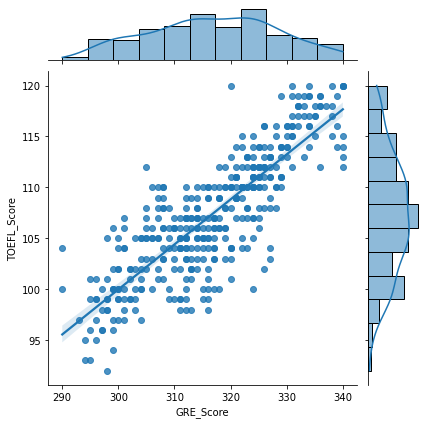

In [20]:
abc=sns.jointplot(ap.GRE_Score, ap.TOEFL_Score, kind = 'reg');

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


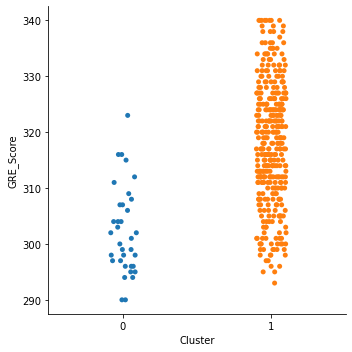

In [21]:
sns.catplot('Cluster', 'GRE_Score', data=ap)

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


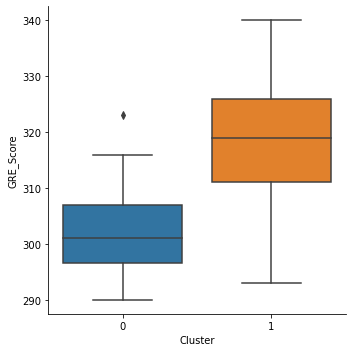

In [22]:
sns.catplot('Cluster', 'GRE_Score', data=ap, kind='box')

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='GRE_Score'>

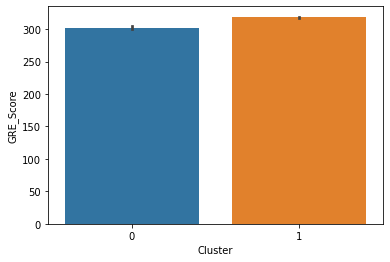

In [23]:
# find average GRE SCore of those who are admitted
sns.barplot('Cluster', 'GRE_Score', estimator=np.mean, data=ap)

In [24]:
y = ap.Cluster.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
ap.drop('Cluster', inplace=True, axis=1)

In [26]:
ap.head()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [27]:
#standardize the variable
ss= StandardScaler()
ss.fit(ap)
X=ss.transform(ap)
X[:5,:]

StandardScaler()

array([[ 1.762,  1.747,  0.799,  1.094,  1.167,  1.765,  0.909],
       [ 0.628, -0.068,  0.799,  0.597,  1.167,  0.455,  0.909],
       [-0.07 , -0.563, -0.077, -0.398,  0.053, -1.006,  0.909],
       [ 0.453,  0.427, -0.077,  0.099, -1.061,  0.119,  0.909],
       [-0.245, -0.727, -0.952, -1.392, -0.504, -0.653, -1.1  ]])

In [28]:
#split data into train and test
X_train,X_test,_,y_test= train_test_split(X,y,test_size=0.25) #np array # Target #TestSize

In [29]:
# Examine the result
X_train.shape
X_test.shape

(300, 7)

(100, 7)

In [30]:
#Develop model
#create an instance of modelling class
clf=KMeans(n_clusters=2)


In [31]:
# Train object over data
clf.fit(X_train)

KMeans(n_clusters=2)

In [32]:
#Check the centers
clf.cluster_centers_
#there are 2 clusters wrt to 1 and 2

array([[ 0.796,  0.801,  0.748,  0.713,  0.655,  0.799,  0.645],
       [-0.696, -0.63 , -0.641, -0.672, -0.631, -0.683, -0.545]])

In [33]:
clf.cluster_centers_.shape

(2, 7)

In [34]:
clf.labels_

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [35]:
clf.labels_.size

300

In [36]:
# WSS Score
# within cluster - sum of squared distance to respective centroids, SSE
clf.inertia_

1117.7462493858297

In [37]:
#This sproblem had pre decided clusters
#To determine the number of clusters in other dataset- 1. Screeplot 2. Silhouette Score

from sklearn.metrics import silhouette_score

In [38]:
silhouette_score(X_train, clf.labels_)

0.3703988540766372

In [39]:
# make predictions over our test data and chek accuracy
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [40]:
# how good is prediction
# number of y_pred and y_yest have to be equal
np.sum(y_pred==y_test)/y_test.size

0.44

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

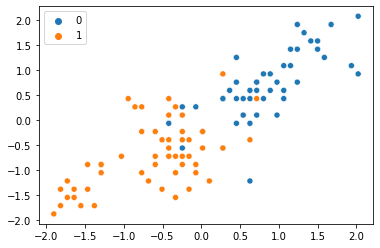

In [41]:
dx=pd.Series(X_test[:,0]) #taken first column
dy=pd.Series(X_test[:,1]) # taken second column
sns.scatterplot(dx,dy, hue=y_pred)

In [42]:
sse= []
for i,j in enumerate(range(10)):
    n_clusters = i + 1
    clf1=KMeans(n_clusters = n_clusters)
    clf1.fit(X_train)
    sse.append(clf1.inertia_)


C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

In [43]:
sse

[2114.1012118919675,
 1117.7462493858297,
 865.1492295761483,
 710.046583075399,
 634.6177025976269,
 566.8564284301691,
 529.2428339856547,
 501.4738376948193,
 476.0060238855598,
 451.3683051219393]

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

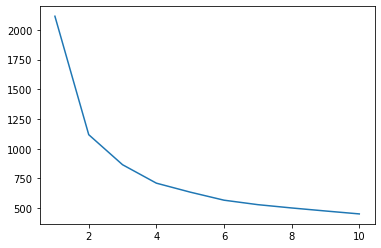

In [44]:
# screeplot
sns.lineplot(range(1,11),sse)